## Objective:
Test several classification algorithms like K-Means and DBSCAN

In [79]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
original_data = pd.read_csv('data\data_tfidf.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Admin\AppData\Local\Temp\ipykernel_9984\3023130889.py:1: SyntaxWarning: invalid escape sequence '\d'
  original_data = pd.read_csv('data\data_tfidf.csv')


In [81]:
data = original_data.copy()

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer # Import TF-IDF Library
data['type_of_view']

0                                           beach, lake
1     beauty of the coast of Hong Kong, Sai Wan beac...
2                                        forests, views
3                                    views, wildflowers
4                                     forests and views
                            ...                        
82            Pyramid Hill, Ma On Shan, The Hunch Backs
83                Sweet Gum Woods, Thousand-Island Lake
84                                    Tai Tam Reservoir
85                        Views and tourist attractions
86    mountain peaks, traditional villages, coastal ...
Name: type_of_view, Length: 87, dtype: object

In [83]:
tf = TfidfVectorizer()
type_of_view_tf = tf.fit_transform(data['type_of_view'])

In [84]:
type_of_view_tf # Our vocabulary has 361 unique words

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 675 stored elements and shape (87, 361)>

In [85]:
tf.vocabulary_ # See the inndex of each word

{'beach': 19,
 'lake': 143,
 'beauty': 22,
 'of': 196,
 'the': 299,
 'coast': 53,
 'hong': 125,
 'kong': 140,
 'sai': 241,
 'wan': 339,
 'azure': 13,
 'sky': 265,
 'and': 6,
 'crystal': 65,
 'clear': 51,
 'seawater': 247,
 'stargazing': 275,
 'area': 7,
 'tai': 288,
 'long': 157,
 'ham': 109,
 'tin': 303,
 'chek': 42,
 'keng': 139,
 'pier': 209,
 'shingle': 258,
 'beaches': 20,
 'mangroves': 166,
 'forests': 92,
 'views': 332,
 'wildflowers': 348,
 'lakes': 144,
 'lead': 149,
 'mine': 170,
 'pass': 201,
 'grassy': 103,
 'hill': 117,
 'needle': 186,
 'shing': 257,
 'mun': 178,
 'reservoir': 227,
 'historical': 120,
 'caves': 39,
 'mo': 172,
 'shan': 252,
 'tea': 295,
 'cultivation': 66,
 'fields': 86,
 'new': 189,
 'territories': 298,
 'tsing': 317,
 'ma': 162,
 'bridge': 31,
 'shenzhen': 255,
 'mist': 171,
 'enveloped': 80,
 'scenery': 243,
 'observation': 194,
 'deck': 70,
 'overlooking': 198,
 'tsuen': 318,
 'stonecutters': 280,
 'ho': 122,
 'pui': 219,
 'irrigation': 133,
 'native':

In [86]:
all_features_name = tf.get_feature_names_out()
for word in all_features_name:
    indx = tf.vocabulary_.get(word)
    print(f"{word} {tf.idf_[indx]}") # Print the idf score (Weighting) of all words

360 4.7841896339182615
aberdeen 4.7841896339182615
acacia 4.7841896339182615
admire 4.7841896339182615
aguilar 4.7841896339182615
ancient 4.378724525810097
and 2.386294361119891
area 4.7841896339182615
areas 4.7841896339182615
as 4.7841896339182615
attractions 4.7841896339182615
awe 4.7841896339182615
azalea 4.7841896339182615
azure 4.378724525810097
backdrop 4.7841896339182615
backs 4.7841896339182615
basalt 4.7841896339182615
bay 3.6855773452501515
bays 4.7841896339182615
beach 3.531426665422893
beaches 3.2801122371419873
beacon 4.7841896339182615
beauty 4.378724525810097
bell 4.7841896339182615
beneath 4.7841896339182615
big 4.7841896339182615
biodiversity 4.7841896339182615
birds 4.7841896339182615
blockhouse 4.7841896339182615
blooming 4.378724525810097
box 4.7841896339182615
bridge 3.8678989020441064
bridges 4.7841896339182615
brisbane 4.7841896339182615
buddha 4.7841896339182615
by 4.7841896339182615
cairn 4.7841896339182615
camp 4.7841896339182615
can 4.7841896339182615
caves 4

In [87]:
type_of_view_tf.toarray()[:1] # tf-idf score of 'beach' is 0.653

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.65343476,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [88]:
# Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data.select_dtypes(np.number))
data_normalized

array([[ 0.35359638,  0.48765566,  0.82273303, ..., -0.31822291,
         1.89181061, -0.4       ],
       [ 0.67495987,  2.07463363,  1.53950323, ..., -0.31822291,
         1.89181061, -0.4       ],
       [ 0.30927038,  1.28114464,  0.82273303, ..., -0.31822291,
         1.89181061, -0.4       ],
       ...,
       [ 0.2031796 ,  0.        ,  0.46434794, ..., -0.31822291,
        -0.52859414, -0.4       ],
       [ 4.71970727,  0.        ,  1.18111813, ..., -0.31822291,
        -0.52859414, -0.4       ],
       [ 6.93600722,  0.        ,  0.46434794, ..., -0.31822291,
        -0.52859414, -0.4       ]], shape=(87, 21))

In [89]:
data_normalized

array([[ 0.35359638,  0.48765566,  0.82273303, ..., -0.31822291,
         1.89181061, -0.4       ],
       [ 0.67495987,  2.07463363,  1.53950323, ..., -0.31822291,
         1.89181061, -0.4       ],
       [ 0.30927038,  1.28114464,  0.82273303, ..., -0.31822291,
         1.89181061, -0.4       ],
       ...,
       [ 0.2031796 ,  0.        ,  0.46434794, ..., -0.31822291,
        -0.52859414, -0.4       ],
       [ 4.71970727,  0.        ,  1.18111813, ..., -0.31822291,
        -0.52859414, -0.4       ],
       [ 6.93600722,  0.        ,  0.46434794, ..., -0.31822291,
        -0.52859414, -0.4       ]], shape=(87, 21))

In [90]:
from scipy.sparse import csr_matrix
data_normalized_sparse = csr_matrix(data_normalized) # Transform our normalized data to a sparse matrix

In [91]:
from scipy.sparse import hstack
data_tf = hstack([type_of_view_tf, data_normalized_sparse]) # Merge two dataframe

### K-Means

In [92]:
# Implement K-Means Algorithm with 15 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=15, random_state=42).fit(data_tf)
labels = kmeans.labels_


In [93]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data_tf, labels)
silhouette_avg

0.34070366231420357

In [94]:
k_values = range(2, 40)  # Test with k in range (2,40), draw the Elbow curse to select the best k
silhouette_scores = []
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data_tf)
    score = silhouette_score(data_tf, kmeans.labels_)
    silhouette_scores.append(score)
    inertia.append(kmeans.inertia_)
#Elbow curve plots a metric (usually the within-cluster sum of squares (WCSS) or inertia) against the number of clusters (k).
#WCSS measures the sum of squared distances between each data point and the centroid of its assigned cluster.
#The "elbow point" suggests the optimal number of clusters, where further increasing k provides little improvement in clustering quality.


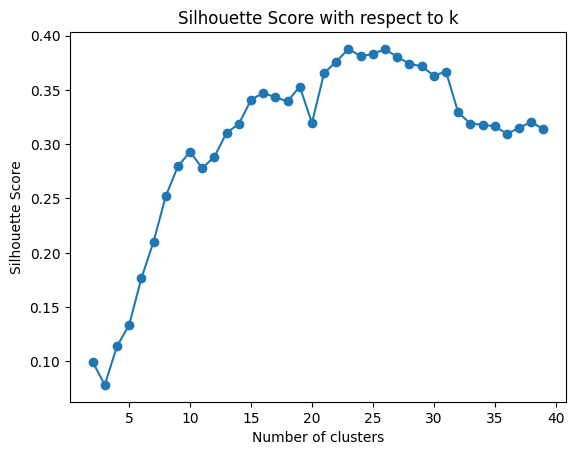

In [95]:
import matplotlib.pyplot as plt

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score with respect to k')
plt.show()

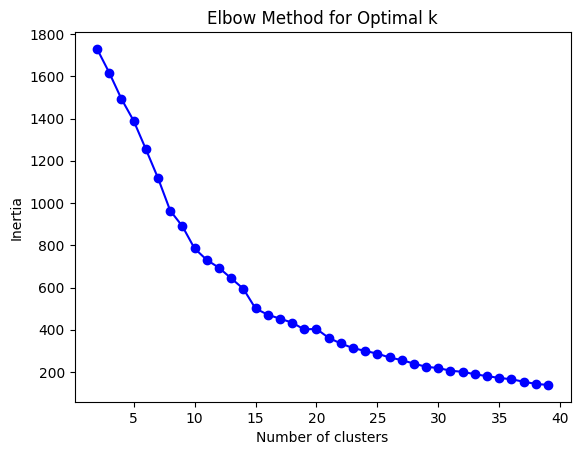

In [96]:
plt.plot(k_values, inertia, 'bo-')  # 'bo-' is green, circle
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()
#Optimal k is 15, we can see that when k increase from 15 onwards, inertia does not decrease too much

C:\Users\Admin\AppData\Local\Temp\ipykernel_9984\1257342145.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


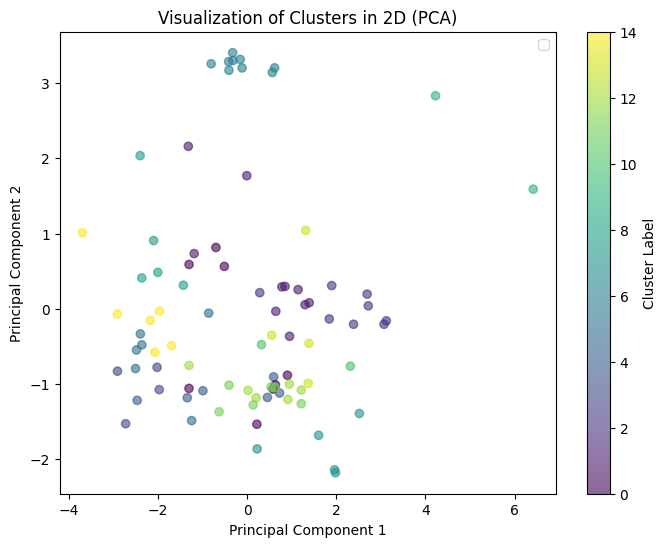

In [97]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_tf)

# Draw scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
#Add title and labels
plt.title('Visualization of Clusters in 2D (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar(scatter, label='Cluster Label')
plt.show()

### DBSCAN

In [98]:
from sklearn.cluster import DBSCAN #Implement with DBSCAN

In [99]:
dbscan = DBSCAN(eps = 3.5, min_samples=2) 
# Eps is the radius of the circle around the solid point, min_samples is the number of point in that circle

In [100]:
labelss = dbscan.fit_predict(data_tf)

In [101]:
np.unique(labelss)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19])

C:\Users\Admin\AppData\Local\Temp\ipykernel_9984\1387251209.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


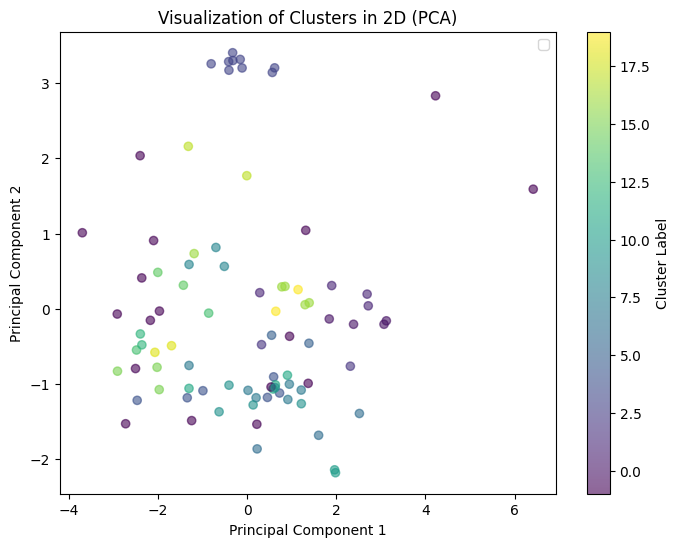

In [102]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_tf)

# Draw scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labelss, cmap='viridis', alpha=0.6)

# Add title and labels
plt.title('Visualization of Clusters in 2D (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar(scatter, label='Cluster Label')
plt.show()

eps: 1.5, min_samples: 2, silhouette: -0.137, clusters: 7, noise points: 72
eps: 2.0, min_samples: 2, silhouette: 0.168, clusters: 14, noise points: 39
eps: 2.0, min_samples: 3, silhouette: 0.102, clusters: 9, noise points: 49
eps: 2.0, min_samples: 4, silhouette: 0.024, clusters: 4, noise points: 65
eps: 2.0, min_samples: 5, silhouette: -0.013, clusters: 2, noise points: 74
eps: 2.5, min_samples: 2, silhouette: 0.260, clusters: 17, noise points: 28
eps: 2.5, min_samples: 3, silhouette: 0.163, clusters: 10, noise points: 42
eps: 2.5, min_samples: 4, silhouette: 0.080, clusters: 6, noise points: 56
eps: 2.5, min_samples: 5, silhouette: 0.018, clusters: 2, noise points: 72
eps: 2.5, min_samples: 6, silhouette: 0.018, clusters: 2, noise points: 72
eps: 3.0, min_samples: 2, silhouette: 0.315, clusters: 19, noise points: 20
eps: 3.0, min_samples: 3, silhouette: 0.200, clusters: 11, noise points: 36
eps: 3.0, min_samples: 4, silhouette: 0.144, clusters: 8, noise points: 45
eps: 3.0, min_samp

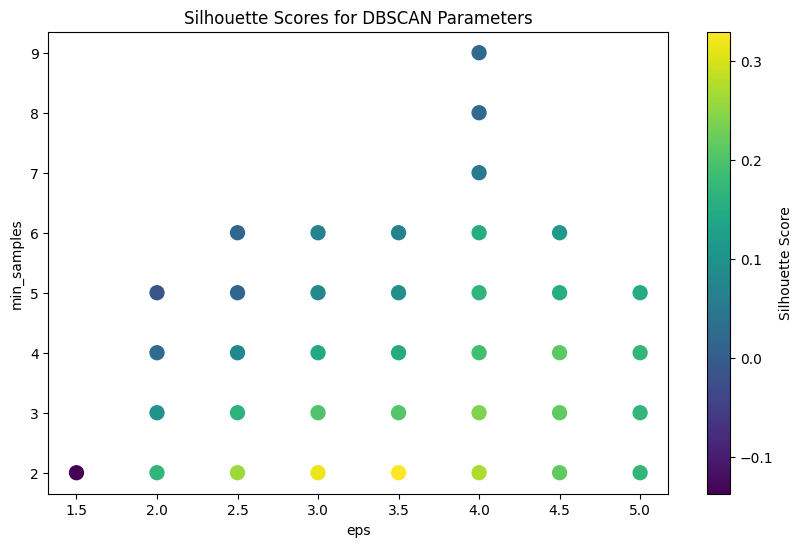

In [103]:
# List of eps and min_sample values to test
eps_values = np.arange(1, 5.5, 0.5)  
min_samples_values = range(2, 10)  

# LStore results
results = []

# Search through all combinations of eps_values and min_samples_values
for eps in eps_values:
    for min_samples in min_samples_values:
        # Start and fit the data
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_tf)
        
        # Check the number of clusters 
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        if n_clusters > 1:  # Calculate the Sihouette score only if there are more than 1 cluster
            score = silhouette_score(data_tf, labels)
            results.append((eps, min_samples, score, n_clusters, n_noise))
            print(f"eps: {eps:.1f}, min_samples: {min_samples}, silhouette: {score:.3f}, clusters: {n_clusters}, noise points: {n_noise}")

# Find the best combication based on Sihouettte Score
if results:
    best_result = max(results, key=lambda x: x[2])  # Choose the result with the best Sihouette score
    print(f"\nBest: eps={best_result[0]:.1f}, min_samples={best_result[1]}, silhouette={best_result[2]:.3f}")

# Draw graph with silhouette scores
scores = [(r[0], r[1], r[2]) for r in results]
eps_list = [r[0] for r in scores]
min_samples_list = [r[1] for r in scores]
sil_scores = [r[2] for r in scores]

plt.figure(figsize=(10, 6))
plt.scatter(eps_list, min_samples_list, c=sil_scores, cmap='viridis', s=100)
plt.colorbar(label='Silhouette Score')
plt.xlabel('eps')
plt.ylabel('min_samples')
plt.title('Silhouette Scores for DBSCAN Parameters')
plt.show()

We find that K-Means has achieved the higher Sihouette Score, but none of them has a high Sihouette score, and there are too much noise in the classification